In [1]:
from pathlib import Path
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
import torchvision.models as models
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *
from cmd_classes_funcs_Marchese import *

/home/CAMPUS/cemb2020/anaconda3/envs/arcslab/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
torch.cuda.set_device(1)
torch.cuda.current_device()

1

## Use two functions and classes from cmd_classes_funcs_Marchese to make train/valid dataset

In [3]:
# Get classes and filenames
path = Path("data")
classes = get_class_labels(path)
all_filenames = get_filenames(path)

In [4]:
# Getting size of dataset and corresponding list of indices
dataset_size = len(all_filenames)
dataset_indices = list(range(dataset_size))

In [5]:
# Shuffling the indices
np.random.shuffle(dataset_indices)

In [6]:
# Getting index for where we want to split the data
val_split_index = int(np.floor(0.2 * dataset_size))

In [7]:
# Splitting list of indices into training and validation indices
train_idx, val_idx = dataset_indices[val_split_index:], dataset_indices[:val_split_index]

In [8]:
# Getting list of filenames for training and validation set
train_filenames = [all_filenames[i] for i in train_idx]
val_filenames = [all_filenames[i] for i in val_idx]

In [9]:
# Create training and validation datasets
train_data = ImageWithCmdDataset(classes, train_filenames)
val_data = ImageWithCmdDataset(classes, val_filenames)

In [10]:
# Creating DataLoader
dls = DataLoaders.from_dsets(train_data, val_data)
dls = dls.cuda()

In [11]:
net = MyModel_next101()
net

MyModel_next101(
  (cnn): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): S

In [12]:
learn = Learner(dls, net, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [31]:
# Freeze model to train the head
learn.freeze()

SuggestedLRs(lr_min=0.0006309573538601399, lr_steep=0.0003311311302240938)

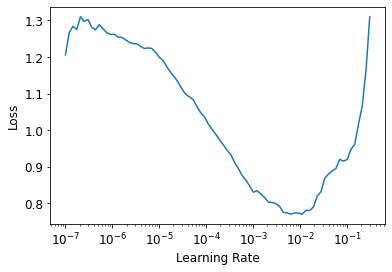

In [13]:
# Find good learning rate
learn.lr_find()

In [33]:
# Train head of model
learn.fit_one_cycle(4, 0.00052)

epoch,train_loss,valid_loss,accuracy,time
0,0.440565,0.435757,0.880629,00:45
1,0.331627,0.294572,0.904217,00:45
2,0.234770,0.229130,0.922087,00:45
3,0.133673,0.192203,0.928520,00:45


SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=7.585775847473997e-07)

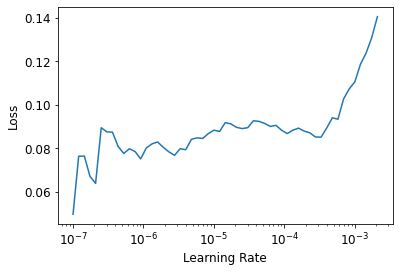

In [34]:
# unfreeze to train the whole model
learn.unfreeze()
learn.lr_find()

In [35]:
learn.fit(10, lr=9.1e-08)

epoch,train_loss,valid_loss,accuracy,time
0,0.081325,0.190078,0.933524,00:45
1,0.081243,0.192545,0.931380,00:45
2,0.079634,0.192836,0.931380,00:45
3,0.082082,0.190230,0.931380,00:45
4,0.081149,0.189052,0.934239,00:45
5,0.080045,0.188486,0.932094,00:45
6,0.078646,0.193396,0.929235,00:45
7,0.081079,0.189472,0.932809,00:45
8,0.074829,0.188264,0.931380,00:45
9,0.077491,0.190029,0.931380,00:45


In [ ]:
# maybe try to get a confusion matrix...

In [ ]:
learn.export(os.path.abspath('cmd_fai.pkl'))

In [36]:
PATH = 'cmd_fai_next50.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
learn.model

In [ ]:
net = models.resnet18()
net